<center><h2>А/В тестування</h2>
<h3>Вплив повідомлення про знижку на рішення про придбання продукту</h3></center>

<h4>Контекст дослідження</h4>
<li>Гіпотеза 0: повідомлення про знижку не є вирішальним для рішення про придбання продукту (конверсія від реєстрації до підписки майже не змінюється)</li>
<li>Гіпотеза 1: якщо користувачам повідомити про наявність знижки, то конверсія до покупки збільшиться, навіть якщо насправді ціна залишається попередньою</li>

<li>Група А: пропонуємо користувачам придбати підписку за USD4.99</li>
<li>Група Б: пропонуємо користувачам придбати підписку за USD4.99, але кажемо що це ціна зі знижкою 50%</li>

In [3]:
import pandas as pd

In [5]:
ds = pd.read_csv('ab_test_data.csv')
ds.head()

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 04:40:55.848109,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 00:26:45.486187,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:33.639464,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 07:04:49.957013,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50.116680,b,0


In [7]:
#Кількість респондентів в кожній групі
group_a = ds[ds.test_group == 'a']
group_b = ds[ds.test_group == 'b']
print (f'There are {len(group_a)} users in A-group and {len(group_b)} users in B-group')

There are 10013 users in A-group and 9985 users in B-group


In [9]:
a_users = group_a['user_id'].nunique()
b_users = group_b['user_id'].nunique()
print(a_users)
print(b_users)
#all users in the column are unique

10013
9985


In [11]:
#Кількість конверсій в кожній групі та рівень конверсії
a_conv = group_a['conversion'].sum()
b_conv = group_b['conversion'].sum()
a_conv_level = round((a_conv/a_users), 3)*100
b_conv_level = round((b_conv/b_users), 3)*100
print (f'There have been {a_conv} conversions in A-group and {b_conv} conversions in B-group')
print(f'Level of conversion in A-group is {a_conv_level}, in B-group – {b_conv_level}')

There have been 611 conversions in A-group and 889 conversions in B-group
Level of conversion in A-group is 6.1, in B-group – 8.9


In [15]:
date = ds.timestamp.str.split(' ', expand = True)[0]
ds.insert(1, 'Date', value = date)
ds.Date = pd.to_datetime(ds['Date'])
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     19998 non-null  object        
 1   Date        19998 non-null  datetime64[ns]
 2   timestamp   19998 non-null  object        
 3   test_group  19998 non-null  object        
 4   conversion  19998 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 781.3+ KB


In [19]:
#Дата початку тесту
start_date = ds.Date.min()

#Дата завершення тесту
end_date = ds.Date.max()
#Тривалість тесту
test_len = end_date - start_date
print(f'The date of the test start is {start_date}, the date of the test end is {end_date}, the test length is {test_len}')

The date of the test start is 2023-07-03 00:00:00, the date of the test end is 2023-07-25 00:00:00, the test length is 22 days 00:00:00


In [21]:
from scipy import stats

In [23]:
alpha = 0.05

#В якості альтернативної гіпотези ми вважаємо, що середнє значення конверсії в групі А буде меншим, ніж в групі Б
#група А отримувала звичайну ціну без акції, група Б отримувала повідомлення про знижку
t_stat, pvalue = stats.ttest_ind(ds[ds['test_group']=='a']['conversion'],
                                 ds[ds['test_group']=='b']['conversion'], alternative = 'less')
print ('T-statistics is ', round(t_stat, 2))
print ('P-value is ', round(pvalue, 2))

if pvalue < alpha:
    print(f'The difference is statistically significant, Null hypothesis is rejected')
else:
    print(f'The difference is statisically not significant, Null hypothesis can not be rejected')

T-statistics is  -7.53
P-value is  0.0
The difference is statistically significant, Null hypothesis is rejected


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

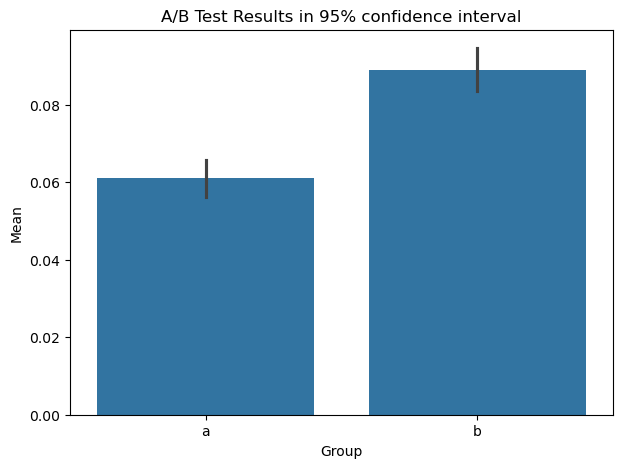

In [26]:
plt.figure(figsize=(7, 5))
sns.barplot(x=ds['test_group'], 
            y=ds['conversion'], 
            errorbar=('ci', 95)) # Confidence Intervals

plt.title('A/B Test Results in 95% confidence interval')
plt.xlabel('Group')
plt.ylabel('Mean')

plt.show()

<b>Висновки А/В тесту:</b>
<p>Загальні дані:</p>
    <li>Загальна тривалість тесту склала 22 дні</li>
    <li>В групі А прийняли участь 10013 респонденти, в групі Б – 9985</li>
    <li>Респондентам в групі А пропонували купити підписку за звичайною ціною USD4.99, респондентам в групі Б також пропонували купити підписку за USD4.99, але зазначалось що це ціна зі знижкою 50%</li>
    <li>При цьому кількість конверсій в групі Б виявилась вищою і склала 889 проти 611 у групі А</li>
    <li>Рівень конверсії в групі Б складає 8,9%, в групі А – 6,1%</li>
<ol>1. В результаті проведення незалежного А/Б тесту ми отримали рівень p-value, який виходить за межі статистично значущого діапазону, що дозволило нам відхилити нульову гіпотезу про те що повідомлення про знижку не впливає на рішення придбати підписку</ol>
<ol>2. Альтернативна гіпотеза про те що повідомлення про знижку дозволяє збільшити конверсію до покупки є вірною. Приймаємо альтернативну гіпотезу</ol>